In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import make_blobs
import seaborn as sns

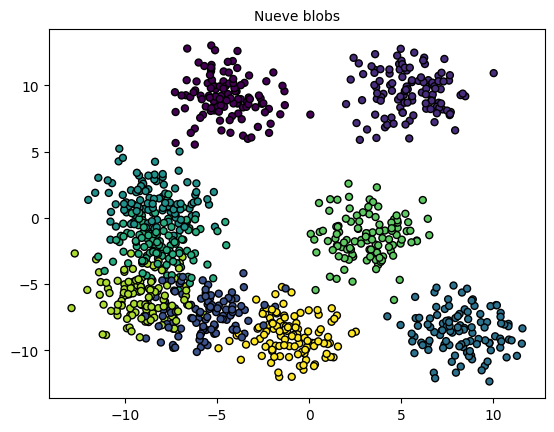

In [26]:
# Crear un conjunto de datos con 3 centros de cluster aleatorios y 1000 puntos de datos
plt.subplot(111)
plt.title("Nueve blobs", fontsize="medium")
x, y = make_blobs(n_samples = 1000, centers = 9,n_features=2,cluster_std = 1.5, shuffle=True, random_state=31)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k");

In [27]:
from sklearn.cluster import KMeans
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k, n_init = "auto").fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [28]:
#Elegimos un valor de kmax y calculamos WSS usando la función anterior
kmax= 12
puntos = calculate_WSS(x, kmax)
puntos

[86087.06445858954,
 49777.732044158445,
 23902.360715231505,
 18202.709933337115,
 12493.222367740058,
 8230.857550774783,
 5199.170362604591,
 4453.784261323613,
 3964.707323627038,
 4058.4155144641845,
 3604.535163617864,
 3421.308437383397]

In [29]:
# Creamos una lista con el rango desde 1 a kmax
# (+1 por que range no incluye el último valor)
range_k = range(1,kmax+1)
puntos_k = list(range_k)
puntos_k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

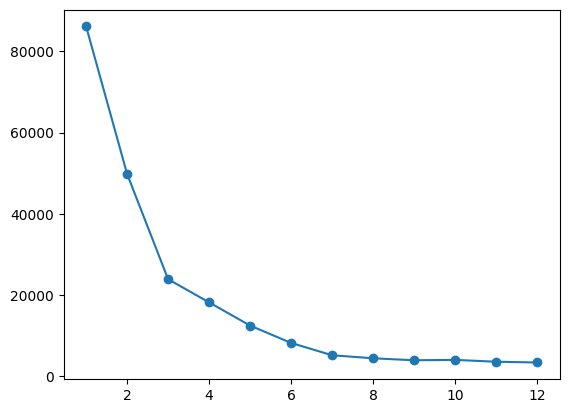

In [30]:
# Graficamos
plt.scatter(puntos_k, puntos)
plt.plot(puntos_k, puntos)
plt.show()